In [1]:
from dataset_handling import Dataset
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

c:\Users\alexi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\alexi\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:215: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True, where=where)


[2836, 2836, 2834]


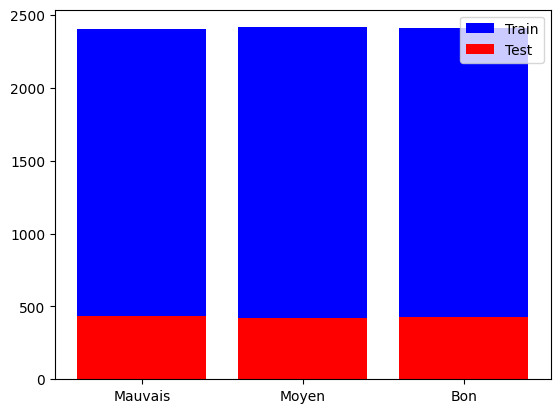

In [2]:
dataset = Dataset('../dataset/winequalityN.csv', data_augmentation_noise=0.15)
X_train, X_test, Y_train, Y_test = dataset.split()

def remap(y):
    if y < 6:
        return [1, 0, 0]
    elif y == 6:
        return [0, 1, 0]
    else:
        return [0, 0, 1]
    
Y_train = np.array([remap(y) for y in Y_train])
Y_test = np.array([remap(y) for y in Y_test])

# Normalizing the data
averages = [np.mean([x[i] for x in X_train]) for i in range(len(X_train[0]))]
std_devs = [np.std([x[i] for x in X_train]) for i in range(len(X_train[0]))]
X_train = np.array([(x - averages) / std_devs for x in X_train])
X_test = np.array([(x - averages) / std_devs for x in X_test])

# Plotting the data
x = [0, 1, 2]
y_tr = [len([y for y in Y_train if np.argmax(y) == n]) for n in x]
y_te = [len([y for y in Y_test if np.argmax(y) == n]) for n in x]
sizes = [y1 + y2 for y1, y2 in zip(y_tr, y_te)]
print(sizes)
x = ['Mauvais', 'Moyen', 'Bon']

plt.bar(x, y_tr, color='blue', label='Train')
plt.bar(x, y_te, color='red', label='Test')
plt.legend()
plt.show()

(7230, 12) (7230, 3) (1276, 12) (1276, 3)
Epoch 1/100
226/226 [==============================] - 3s 5ms/step - loss: 1.0460 - accuracy: 0.4437 - val_loss: 0.9679 - val_accuracy: 0.5227
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 0.9368 - accuracy: 0.5340 - val_loss: 0.8954 - val_accuracy: 0.5533
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.8886 - accuracy: 0.5613 - val_loss: 0.8657 - val_accuracy: 0.5713
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 0.8672 - accuracy: 0.5827 - val_loss: 0.8548 - val_accuracy: 0.5799
Epoch 5/100
226/226 [==============================] - 1s 4ms/step - loss: 0.8582 - accuracy: 0.5799 - val_loss: 0.8490 - val_accuracy: 0.5972
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.8538 - accuracy: 0.5881 - val_loss: 0.8429 - val_accuracy: 0.6011
Epoch 7/100
226/226 [==============================] - 1s 3ms/step - loss: 0.8377 - accuracy: 0.5965

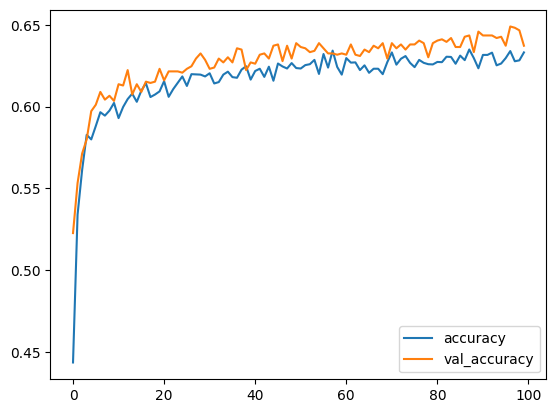

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(12,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=120, validation_data=(X_test, Y_test))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()